# TRAN Jean-Pierre
# LE DEUF Alexandre

## SUICIDE IN THE WORLD
## Data exploration and analysis

In [1]:
#Dataset Link : https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
import pandas as pd

df = pd.read_csv(r"C:\Users\jeanp\Desktop\20170428_20170560_GRP2_PRJ15\master.csv")

In [ ]:
#pip install pycountry-convert

In [2]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

def get_country(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    return (cn_a2_code)

In [ ]:
"""
df['Country_Dim'] = 'Nan'
df['Country_Con'] = 'Nan'
for i in range(len(df)):
    df['Country_Dim'][i] = get_country((df['country'][i]))
    df['Country_Con'][i] = get_continent((df['country'][i]))
"""
#this code generated continent and country name code

In [ ]:
df.head()

In [ ]:
#pip install geopy

In [ ]:
import numpy as np
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="https")

def geolocate_lat(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude)
    except:
        # Return missing value
        return "Nan"
    
def geolocate_lon(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.longitude)
    except:
        # Return missing value
        return "Nan"

In [ ]:
"""
df['Latitude'] = 'Nan'
df['Longitude'] = 'Nan'
for i in range(len(df)):
    df['Latitude'][i] = geolocate_lat((df['Country_Dim'][i]))
    df['Longitude'][i] = geolocate_lon((df['Country_Dim'][i]))
    print("[",i,"/",len(df),"]")
"""
#this code generate longitude and latitude

In [ ]:
df.head()

In [ ]:
#We create a new csv with the geolocalisation of each country
df.to_csv(r"C:\Users\jeanp\Desktop\20170428_20170560_GRP2_PRJ15\master_modifier.csv", encoding='utf-8', index=False)

In [2]:
import pandas as pd
new_df = pd.read_csv(r"C:\Users\jeanp\Desktop\20170428_20170560_GRP2_PRJ15\master_modifier.csv")
new_df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Country_Dim,Country_Con,Latitude,Longitude
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU,33.2588817,-86.8295337
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,AL,EU,33.2588817,-86.8295337
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,AL,EU,33.2588817,-86.8295337
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,AL,EU,33.2588817,-86.8295337
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,AL,EU,33.2588817,-86.8295337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X,UZ,AS,41.32373,63.9528098
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent,UZ,AS,41.32373,63.9528098
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,UZ,AS,41.32373,63.9528098
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z,UZ,AS,41.32373,63.9528098


In [4]:

df_type = pd.DataFrame (columns = ['Columns','Type'])
df_type['Columns'] = new_df.columns
for i in range(len(new_df.dtypes)):
    df_type['Type'][i]= str(new_df.dtypes[i])

df_type

,Columns,Type
0,country,object
1,year,int64
2,sex,object
3,age,object
4,suicides_no,int64
5,population,int64
6,suicides/100k pop,float64
7,country-year,object
8,HDI for year,float64
9,gdp_for_year ($),object


In [5]:
print("number of rows :",len(new_df))
print("number of columns :",len(new_df.columns))
print("number of rows and columns :",new_df.shape)
print("number of elements :",new_df.size)

number of rows : 27820
number of columns : 16
number of rows and columns : (27820, 16)
number of elements : 445120


In [6]:
#pip install missingno

<AxesSubplot:>

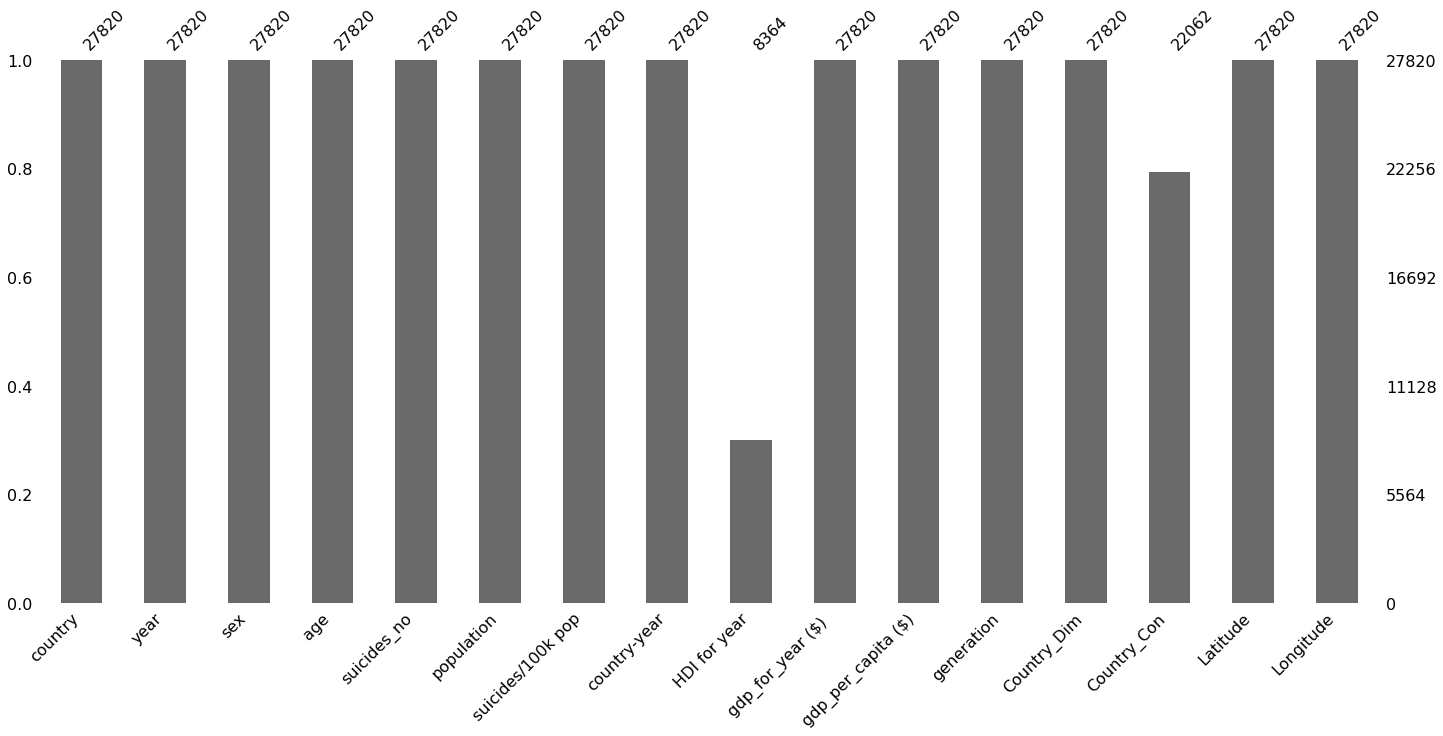

In [7]:
import missingno as msno 
new_df.isnull().sum()
msno.bar(new_df)

In [10]:
#pip install folium

In [9]:

new_df = new_df.replace("Nan",0)
grouped_year_sui = new_df.groupby(['country','year']).agg({'suicides_no':'sum','suicides/100k pop':'sum','population':'first','gdp_per_capita ($)':'first','Country_Con':'first','Latitude':'first','Longitude':'first'}).reset_index()
grouped_year_sui['Country_Con'] = grouped_year_sui['Country_Con'].replace(np.NaN,"NA")

In [10]:
#pip install bar-chart-race
import numpy as np

df_race = pd.pivot_table(grouped_year_sui, values='suicides_no', index=grouped_year_sui.year, columns='country', aggfunc=np.sum)
df_race

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.0,1988.0,NaN,NaN,1861.0,2091.0,NaN,1.0,11.0,...,2982.0,29.0,NaN,NaN,NaN,NaN,5105.0,29446.0,287.0,NaN
1986,NaN,0.0,2284.0,NaN,NaN,2044.0,2139.0,NaN,NaN,NaN,...,2798.0,104.0,NaN,NaN,NaN,NaN,4839.0,30892.0,262.0,NaN
1987,73.0,0.0,2286.0,NaN,NaN,2164.0,2069.0,NaN,3.0,9.0,...,3035.0,119.0,NaN,272.0,10050.0,NaN,4594.0,30783.0,258.0,NaN
1988,63.0,0.0,2354.0,NaN,NaN,2172.0,1851.0,NaN,NaN,14.0,...,NaN,164.0,NaN,270.0,9751.0,NaN,4971.0,30388.0,268.0,NaN
1989,68.0,0.0,2247.0,NaN,NaN,2066.0,1898.0,NaN,NaN,NaN,...,NaN,173.0,NaN,253.0,10887.0,NaN,4361.0,30218.0,344.0,NaN
1990,NaN,1.0,2140.0,93.0,NaN,2202.0,1825.0,114.0,NaN,NaN,...,3753.0,170.0,NaN,298.0,10645.0,NaN,4643.0,30895.0,315.0,1459.0
1991,NaN,0.0,1951.0,80.0,NaN,2288.0,1769.0,134.0,NaN,NaN,...,3559.0,148.0,NaN,273.0,10700.0,NaN,4547.0,30790.0,NaN,1393.0
1992,47.0,0.0,2184.0,83.0,NaN,2251.0,1759.0,144.0,NaN,NaN,...,3550.0,163.0,NaN,271.0,11666.0,NaN,4628.0,30471.0,NaN,1344.0
1993,73.0,1.0,2230.0,106.0,NaN,2038.0,1704.0,119.0,7.0,NaN,...,NaN,174.0,NaN,240.0,12469.0,NaN,4462.0,31084.0,418.0,1355.0


In [18]:
conda install -c conda-forge ffmpeg


Note: you may need to restart the kernel to use updated packages.


Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\conda-script.py", line 11, in <module>
    from conda.cli import main
ImportError: No module named conda.cli


In [19]:
import bar_chart_race as bcr

bcr.bar_chart_race(
    df=df_race,
    filename='World_Suicide.mp4',
    orientation='h',
    sort='desc',
    n_bars=6,
    fixed_order=False,
    fixed_max=True,
    steps_per_period=10,
    interpolate_period=False,
    label_bars=True,
    bar_size=.95,
    period_fmt='Year {x:,.0f}',
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},
    period_summary_func=lambda v, r: {'x': .99, 'y': .18,
                                      's': f'Total deaths: {v.nlargest(6).sum():,.0f}',
                                      'ha': 'right', 'size': 8, 'family': 'Courier New'},
    perpendicular_bar_func='median',
    period_length=500,
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',
    title='Suicide by Country',
    title_size='',
    bar_label_size=7,
    tick_label_size=7,
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},
    scale='linear',
    writer=None,
    fig=None,
    bar_kwargs={'alpha': .7},
    filter_column_colors=False)  

C:\Users\ledeu\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ledeu\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ledeu\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ledeu\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ledeu\.conda\envs\tensorflow\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ledeu\.conda\envs\tensorflow\lib\site-packages\matplotlib\bac

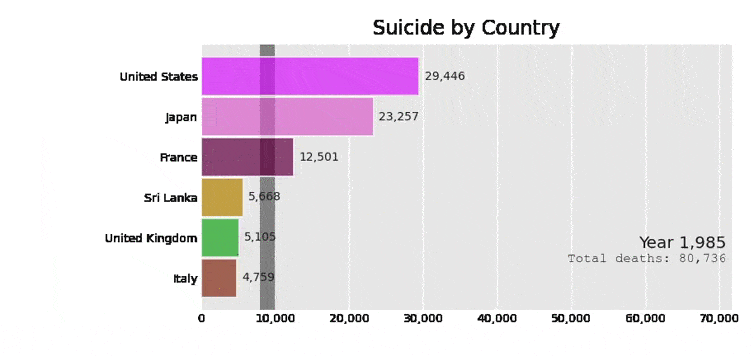

In [25]:
from IPython.display import Image
racegif = Image(filename='World_Suicide.gif')
racegif

In [1]:
#pip install dash==1.19.0
#pip install dash-gif-component

In [ ]:
# -*- coding: utf-8 -*-

# Run this app with `python app.py` and
# visit http://127.0.0.1:8050/ in your web browser.
# We will run all the graph in the dash, treemap, scratter, heatmap, sunburst
# They are all interactive data visualizations

import dash
import dash_core_components as dcc
import dash_html_components as html
import dash_gif_component as gif
import plotly.express as px
import pandas as pd
import numpy as np
import dash
import dash_table
import plotly.graph_objects as go
import random
from IPython.display import Image
import bar_chart_race as bcr

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options

new_df = pd.read_csv(r"C:\Users\jeanp\Desktop\20170428_20170560_GRP2_PRJ15\master_modifier.csv")
new_df.head()
new_df = new_df.replace("Nan",0)
grouped_year_sui = new_df.groupby(['country','year']).agg({'suicides_no':'sum','suicides/100k pop':'sum','population':'first','gdp_per_capita ($)':'first','Country_Con':'first','Latitude':'first','Longitude':'first'}).reset_index()
grouped_year_sui['Country_Con'] = grouped_year_sui['Country_Con'].replace(np.NaN,"NA")

df_type = pd.DataFrame (columns = ['Columns','Type'])
df_type['Columns'] = new_df.columns
for i in range(len(new_df.dtypes)):
    df_type['Type'][i]= str(new_df.dtypes[i])
df_race = pd.pivot_table(grouped_year_sui, values='suicides_no', index=grouped_year_sui.year, columns='country', aggfunc=np.sum)
df_race




def generate_table(dataframe, max_rows=16):
    return html.Table(style={'textAlign': 'center','margin-top':'10px','border':'1px solid black','margin-left': '150px', 'margin-right': '150px','display':'inline-block'},children=[
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(min(len(dataframe), max_rows))
        ])
    ])

def generate_type(dataframe):
    return html.Table(style={'textAlign': 'center','margin-top':'10px','border':'1px solid black','margin-left': '150px', 'margin-right': '150px','display':'inline-block'},children=[
        html.Thead(
            html.Tr([html.Th(col) for col in dataframe.columns])
        ),
        html.Tbody([
            html.Tr([
                html.Td(dataframe.iloc[i][col]) for col in dataframe.columns
            ]) for i in range(len(dataframe))
        ])
    ])

treemap1 = px.treemap(grouped_year_sui, path=['year','country','population','gdp_per_capita ($)'], 
                 values='suicides_no')
treemap1.update_layout(
    paper_bgcolor='white'
)

treemap2 = px.treemap(grouped_year_sui, path=['country', 'year','population','gdp_per_capita ($)'], 
                 values='suicides_no') 
treemap2.update_layout(
    paper_bgcolor='white'
)

linechart = px.line(grouped_year_sui, x="year", y="suicides_no", color="country",
              line_group="country", hover_name="country")
linechart.update_layout(
    paper_bgcolor='white'
)

scatter1 = px.scatter(grouped_year_sui, x="year", y="suicides_no",size="gdp_per_capita ($)", color="country",
                 hover_name="country", log_x=True, size_max=60)
scatter1.update_layout(
    paper_bgcolor='white'
)

scatter2 = px.scatter(grouped_year_sui, x="year", y="suicides_no",size="population", color="country",
                 hover_name="country", log_x=True, size_max=60)
scatter2.update_layout(
    paper_bgcolor='white'
)

scatter3 = px.scatter(grouped_year_sui, x="population", y="suicides_no", animation_frame="year", color="country", hover_name="country")
scatter3["layout"].pop("updatemenus")
scatter3.update_layout(
    paper_bgcolor='white'
)

boxchart = px.box(grouped_year_sui, x="country", y=["suicides_no"],points="all",color='country')

boxchart.update_layout(
    paper_bgcolor='white'
)

heatmap = go.Figure(data=go.Heatmap(
        z=grouped_year_sui.suicides_no,
        x=grouped_year_sui.year,
        y=grouped_year_sui.country,
        colorscale='Viridis'))

heatmap.update_layout(
    paper_bgcolor='white'
)

button_layer_1_height = 1.08
heatmap.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["colorscale", "Viridis"],
                    label="Viridis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Cividis"],
                    label="Cividis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Blues"],
                    label="Blues",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Greens"],
                    label="Greens",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        )
    ]
)
            
heatmap.update_layout( 
    xaxis=dict( 
        rangeselector=dict( 
            buttons=list([ 
                dict(count=1, 
                     step="year", 
                     stepmode="backward"), 
            ]) 
        ), 
        rangeslider=dict( 
            visible=True
        ), 
    ),
    annotations=[
    dict(text="colorscale", x=0, xref="paper", y=1.06, yref="paper",
         align="left", showarrow=False)
    ]
)

years = grouped_year_sui.year
liste_country = grouped_year_sui.country.unique()


fig1 = go.Figure()
fig1.update_layout(
    paper_bgcolor='white'
)
fig2 = go.Figure()
fig2.update_layout(
    paper_bgcolor='white'
)
fig3 = go.Figure()
fig3.update_layout(
    paper_bgcolor='white'
)
fig4 = go.Figure()
fig4.update_layout(
    paper_bgcolor='white'
)
fig5 = go.Figure()
fig5.update_layout(
    paper_bgcolor='white'
)
fig6 = go.Figure()
fig6.update_layout(
    paper_bgcolor='white'
)
fig7 = go.Figure()
fig7.update_layout(
    paper_bgcolor='white'
)
fig8 = go.Figure()
fig8.update_layout(
    paper_bgcolor='white'
)
fig9 = go.Figure()
fig9.update_layout(
    paper_bgcolor='white'
)
fig10 = go.Figure()
fig10.update_layout(
    paper_bgcolor='white'
)

for i in range(0,10):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig1.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig1.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(10,20):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig2.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig2.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(20,30):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig3.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig3.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(30,40):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig4.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig4.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(40,50):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig5.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig5.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(50,60):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig6.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig6.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(60,70):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig7.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig7.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(70,80):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig8.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig8.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(80,90):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig9.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig9.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

for i in range(90,101):
    new_df = grouped_year_sui[grouped_year_sui['country']==liste_country[i]]
    list_suic = new_df['suicides_no']
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)

    fig10.add_trace(go.Bar(x=years,
                y=list_suic,
                name=liste_country[i],
                marker_color="rgb(%s,%s,%s)"% (r,g,b)
                ))
    
fig10.update_layout(
    title='Number of Suicide per Year for each Country ',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Number Of Suicide',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)

fig_sun_1 = px.sunburst(grouped_year_sui, path=['Country_Con', 'country', 'year'], values='suicides_no', color='country')
fig_sun_1.update_layout(
    paper_bgcolor='white'
)
fig_sun_2 = px.sunburst(grouped_year_sui, path=['year', 'Country_Con', 'country'], values='suicides_no', color='country')
fig_sun_2.update_layout(
    paper_bgcolor='white'
)

import folium
from folium.plugins import MarkerCluster

#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(grouped_year_sui)):
    lat = grouped_year_sui.iloc[i]['Latitude']
    long = grouped_year_sui.iloc[i]['Longitude']
    radius=5
    popup_text = """Country : {}<br>
                          year: : {}<br>
             suicides/100k pop: : {}<br>
                    population: : {}<br>
            gdp_per_capita ($): : {}<br>
                    suicides_no : {}<br>"""
    popup_text = popup_text.format(grouped_year_sui.iloc[i]['country'],
                                    grouped_year_sui.iloc[i]['year'],
                                    grouped_year_sui.iloc[i]['suicides/100k pop'],
                                    grouped_year_sui.iloc[i]['population'],
                                    grouped_year_sui.iloc[i]['gdp_per_capita ($)'],
                                   grouped_year_sui.iloc[i]['suicides_no']
                                   )
    folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)

world_map.save("World.html")



    
app.layout = html.Div(style={'background-color': 'white'},children=[
    html.Div(style={'background-color': 'rgba(29, 53, 87, 1)','color':'white','height':'200px'},children=[
        html.H4(style={'padding-top':'75px','font-size':'50px','textAlign': 'center','font_family':'Courier New'},children='Suicide in the World')
    ],className="banner"),
    
    html.Div(style={},children=[
        html.P(style={'textAlign': 'center'},children='We will use a dataset that contains a suicides rates overview between 1985 to 2016.'),
        html.P(style={'textAlign': 'center'},children='Our goal is to understand and explain the possible reasons for suicides throughout the years in the world.'),
        html.P(style={'textAlign': 'center'},children='Explanations could help reduce the results by helping the people involved.')
    ]),
    html.Div(style={},children=[
        html.P(style={'textAlign': 'center'},children='You can see below the dataset we will used.'),
        html.P(style={'textAlign': 'center'},children='At the begining, there was no geolocalisation, but we added them thanks to geopy.geocoders'),
        html.P(style={'textAlign': 'center'},children="At it's right, you can see the type of each columns")
    ]),
    
    generate_table(grouped_year_sui),
    generate_type(df_type),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='World Map n°1-2 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In the second graphic, you can see an interaciv map with the amount of suicide. this is the graph without any modification (each suicide for each age, sexe, etc...)'),
        html.P(style={'textAlign': 'center'},children='In the second graphic, you can see an interaciv map with the amount of suicide for each country between 1985 to 2016'),
        html.P(style={'textAlign': 'center'},children='We want to show this graphic because we want to display the entire world. With that, you can search by yourself'),
    ]),
    html.Div(html.Iframe(id='map',srcDoc=open('World.html','r').read(),width='50%',height='600'),style={'textAlign': 'center'}),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Tree Map n°1 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the amount of suicide for each year and compare each country'),
        html.P(style={'textAlign': 'center'},children='With this kind of graphic, we can see immediatly the big values for each year'),
    ]),
    dcc.Graph(
        id='first_treemap',
        figure=treemap1
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Tree Map n°2 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the amount of suicide for each country and compare it for each year'),
        html.P(style={'textAlign': 'center'},children='With this kind of graphic, we can see immediatly the big values like the first one but for a country'),
    ]),
    dcc.Graph(
        id='second_treemap',
        figure=treemap2
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Line Chart : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the evolution of suicide for each country by the year'),
        html.P(style={'textAlign': 'center'},children='With this kind of graphic we can select or unselect country that we want or not to see on the graph.'),
    ]),
    dcc.Graph(
        id='linechart',
        figure=linechart
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Scatter n°1 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the evolution of suicide for each country by the year but the buble represent the gdp per capita of the country'),
        html.P(style={'textAlign': 'center'},children='With this kind of graphic we can select or unselect country that we want or not to see on the graph and see if a variable depend from an other'),
    ]),
    dcc.Graph(
        id='scatter1',
        figure=scatter1
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Scatter n°2 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the evolution of suicide for each country by the year but the buble represent the population of the country'),
        html.P(style={'textAlign': 'center'},children='With this kind of graphic we can select or unselect country that we want or not to see on the graph and see if a variable depend from an other'),
    ]),
    dcc.Graph(
        id='scatter2',
        figure=scatter2
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Scatter n°3 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the evolution of suicide for each country by the year. This time we can select the year and compare each country. We can see the population and the amount of suicide'),
    ]),
    dcc.Graph(
        id='scatter3',
        figure=scatter3
        
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Box Chart : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display some statistic about the suicide for each country by the year. '),
    ]),
    dcc.Graph(
        id='boxchart',
        figure=boxchart
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Heat Map : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='In this graphic, we want to display the amount of suicide of each country by the year and compare it with color with other country.'),
        html.P(style={'textAlign': 'center'},children='Thanks to this, we can see which country that has the most amount of suicide.'),
        html.P(style={'textAlign': 'center'},children='We can also change the color for a better visualisation.')
    ]),
    dcc.Graph(
        id='heatmap',style={'width': '90vh', 'height': '90vh','marginLeft': 'auto', 'marginRight': 'auto'},
        figure=heatmap
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Bar Chart n°1-10 : Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='The following graphic will display the amounf of suicide of each country for each year.'),
        html.P(style={'textAlign': 'center'},children='This is an other way to compare this result.'),
    ]),
    dcc.Graph(
        id='barchart1',
        figure=fig1
    ),
    dcc.Graph(
        id='barchart2',
        figure=fig2
    ),
    dcc.Graph(
        id='barchart3',
        figure=fig3
    ),
    dcc.Graph(
        id='barchart4',
        figure=fig4
    ),
    dcc.Graph(
        id='barchart5',
        figure=fig5
    ),
    dcc.Graph(
        id='barchart6',
        figure=fig6
    ),
    dcc.Graph(
        id='barchart7',
        figure=fig7
    ),
    dcc.Graph(
        id='barchart8',
        figure=fig8
    ),
    dcc.Graph(
        id='barchart9',
        figure=fig9
    ),
    dcc.Graph(
        id='barchart10',
        figure=fig10
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Sun Burst n°1: Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='This graphic is very usefull, indeed we can see the amount of suicide for each continent, each country for each year.'),
    ]),
    dcc.Graph(
        id='sunburst1',style={'width': '90vh', 'height': '90vh','marginLeft': 'auto', 'marginRight': 'auto'},
        figure=fig_sun_1
    ),
    html.Div(style={},children=[
        html.H3(style={'textAlign': 'center'},children='Sun Burst n°2: Suicide in World between 1985-2016'),
        html.P(style={'textAlign': 'center'},children='This graphic display the amount of suicide for each year and this time we can see the amount of suicide for each contient for each year.'),
        html.P(style={'textAlign': 'center'},children='We can now compare each continent by the year.'),
    ]),
    dcc.Graph(
        id='sunburst2',style={'width': '90vh', 'height': '90vh','marginLeft': 'auto', 'marginRight': 'auto'},
        figure=fig_sun_2
    )
])




if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
